# import package

In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

# simple test

In [2]:
# Immutable random number
np.random.seed(1234)
# random integer
data_A = np.random.randint(10,40,size=20)
data_B = np.random.randint(10,40,size=20)

print('A = {}, ndim = {}'.format(data_A[:5],data_A.ndim),'B = {}, ndim = {}'.format(data_B[:5],data_B.ndim),sep='\n')

A = [25 29 16 31 22], ndim = 1
B = [26 38 15 26 19], ndim = 1


In [3]:
# transfer ndim to 2D    -----

# Way1
data_A_2D = np.mat(data_A).T
data_B_2D = np.mat(data_B).T

# Way2
data_A_2D = np.reshape(data_A,(len(data_A),1))
data_B_2D = np.reshape(data_B,(len(data_B),1))

X,Y = data_A_2D,data_B_2D

In [4]:
# train & Model performance

lm = linear_model.LinearRegression()
lm.fit(X, Y)

mse  = np.mean((lm.predict(X)-Y) ** 2)
RMSE = sqrt(mse)
r_squared = lm.score(X,Y)
print('MSE\t:',mse)
print('RMSE\t:',RMSE)
print('R2\t:',r_squared)

MSE	: 66.8467044823972
RMSE	: 8.175983395433066
R2	: 0.020238108059108195


# test model by using iris data

In [5]:
iris = datasets.load_iris()
print(type(iris.data))
print(iris.feature_names)

<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# revier data
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# run
x, y = iris_df[list(iris_df)[2]],iris_df[list(iris_df)[0]]
x1, y1 =np.reshape(x.values,(len(x.values),1)),np.reshape(y.values,(len(y.values),1))

# sepal length (cm) vs petal length (cm)

lm = linear_model.LinearRegression()
lm.fit(x1, y1)
lm.score(x1, y1)

0.759954645772515

In [8]:
mse  = np.mean((lm.predict(x1) - y1) ** 2)
RMSE = sqrt(mse)
r_squared = lm.score(x1, y1)
print('MSE\t:',mse)
print('RMSE\t:',RMSE)
print('R2\t:',r_squared)

MSE	: 0.16350022510554504
RMSE	: 0.40435161073692416
R2	: 0.759954645772515


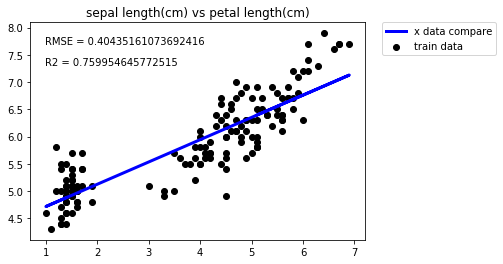

In [9]:
# plot it

plt.figure()
plt.scatter(x1, y1,  color='black',label = 'train data')
plt.plot(x1, lm.predict(x1), color='blue', linewidth=3,label = 'x data compare')
plt.title('sepal length(cm) vs petal length(cm)')

plt.annotate('RMSE = '+str(RMSE), xy=(0, 0), xycoords='figure fraction', xytext=(0.09, 0.83),)
plt.annotate('R2 = '+str(r_squared), xy=(0, 0), xycoords='figure fraction', xytext=(0.09, 0.75))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# if u need to save
# plt.savefig('{}plot1.png'.format(plot_save_path), dpi=300, bbox_inches='tight')
